$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$
### ITCS4156

# Polynomial & Ridge Regression

### Review: 

Let us review linear model on an extremely simple data with three data points as below.



For linear regression, we use sum of squared errors as a cost function to measure how good the fit is. 
As we briefly discussed, there are far more measurement that we can choose as a cost or error function. 
It can be used as a simple measure, or it also can be used as an objective function to minimize for training. 



In machine learning, *what is a good measure to assess the quality of a machine learning model?* Let us step back from what we have learned in class about ML techniques and think about this. 
In previous lectures, we have used a root mean square error (RMSE) to evaluate the model fit on training or test data. But, does the error function tells all the quality of the model? What if you have two models that have same error measures? Which one can you tell better? 

Let us take a look at following codes examples and compare linear model and polynomial model (and further about overfitting and regularization!). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from copy import deepcopy as copy

In [2]:
x = np.arange(3)
t = copy(x)

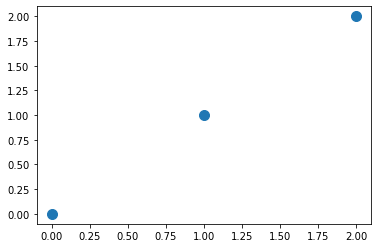

In [3]:
def plot_data():
    plt.plot(x, t, "o", markersize=10)
    
plot_data()

I know that it is silly to apply a linear regression on this obvious model, but let us try. :) 

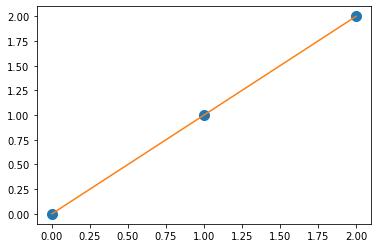

In [4]:
## Least Square solution
# TODO: Fill your codes here to fit and plot as my output
X1 = np.vstack((np.ones(3), x)).T
w = np.linalg.lstsq(X1.T @ X1, X1.T @ t, rcond=1)[0]
y = X1 @ w

plot_data()
plt.plot(x, y)

## Polynomial Regression

Let us imagine that the above three points are samples from nonlinear data; for instance, a part of growing sine curve or a part of 5th-degree polynomial. Is it a good idea to use a linear model to fit a straight line to data? 
In many practical applications, yes. However, knowing the nonlinear trend of data, fitting a straight line is not a good option.

For instance, let us think about parabola-shaped data. If we fit with the previous linear regression model, it will capture only the dcreasing or increasing trend only not the pattern of decreasing and bouncing back afterwards. That is why we develop many different algorithms: to deal with many different, complex data. 

Without giving the simplicity of linear models, we can transform input to nonlinear. We represent the transformation function as $\phi$:
$$
\phi: \Xm \rightarrow \Phi
$$
where $\Phi$ is nonlinear features of the raw input $\Xm$. 

The benefit of nonlinear transformation is that the linearity of parameter is maintained even after the transformation. That is, $\forall i \in \[1, D\]$, the linear model is a linear combination of the nonlinear features $\phi_i$: 
$$
f(\xv; \wv) = w_0 + w_1 \phi_1 + w_2 \phi_2 + w_3 \phi_3 + \cdots, 
$$
where $D$ is the number of nonlinear input features. 
Here, we can see that $f$ is still linear with repect to the parameter $\wv$. 


Polynomial regression uses a simple transformation of input that adds higher degree terms such square, cubic, quartic, and so on:
$$ f(\xv; \wv) = w_0 + w_1 \xv + w_2 \xv^2 + w_3 \xv^3 + \cdots $$

This will increase the number of dimensions as you add additional degrees. For instance, if the original raw input $X$ is two dimensional such as temperature $t$ and humidity $h$, the 3rd-degree polinomial transformation extends the dimension to six, $(t, h, t^2, h^2, t^3, h^3)$. 

Let us make the polynomial regression model and fit to the data above with lease squares.

In [5]:
# Polinomial regression
def poly_regress(x, d=3, t=None, **params):
    """  ridge regression function
    
         x         input data
         t         training target
         d         the degress of polynomial transform
         normalize boolean option for normalization
         @X_poly   transformed input 
         @w        the trained weight w
    """
    
    bnorm = params.pop('normalize', False)
    
    X_poly = []
    # Transformation: append polynomial terms
    for i in range(d+1):
        X_poly.append(x**i)
    
    X_poly = np.vstack(X_poly).T
    
    # normalize 
    if bnorm:
        mu, sd = np.mean(X_poly[:, 1:, None], axis=0), np.std(X_poly[:, 1:, None], axis=0)
        X_poly[:, 1:] = (X_poly[:, 1:] - mu.flat) / sd.flat
        
    # least sqaures
    if t is not None:
        # TODO: add least square solution here
        w = np.linalg.lstsq(X_poly.T @ X_poly, X_poly.T @ t, rcond=1)[0]

        if bnorm:
            return X_poly, mu, sd, w
        return X_poly, w
    
    if bnorm:
        return X_poly, mu, sd
    return X_poly

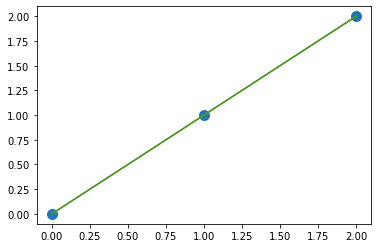

In [6]:
Xp, wp = poly_regress(x, 3, t)
yp = Xp @ wp

plot_data()
plt.plot(x, y)
plt.plot(x, yp)

Hmm... They both look good on this. Then, what is the difference? Let us take a look at how they change if I add the test data. If I compare the MSE, they are equivalent. Try to expand the data for test and see how different they are. 

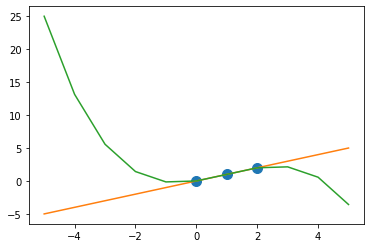

In [7]:
xtest = np.arange(11)-5
Xptest = poly_regress(xtest, 3)
yptest = Xptest @ wp

X1test = np.vstack((np.ones(len(xtest)), xtest)).T
ytest = X1test @ w

plot_data()
plt.plot(xtest, ytest)
plt.plot(xtest, yptest)


Now, what is your pick? Which model looks better? 

<br/><br/><br/><br/><br/><br/>

## The Quality of Model

From the above example, we realized that the model evaluation with the sum (or mean) of squared error we discussed so far is not enough. 

First, let us consider how well a learned model generalizes to new data with respect to the number of training samples. We assume that the test data are drawn from same distribution over example space as training data.  



In this plot, we can compare the two learning algorithms and find which one generalizes better than the other. Also, during the training, we can access to the training error (or empirical loss). This may not look similar (mostly not) to the test error (generalization loss above). 

Let us take a look at the example in the Geron's textbook. 
Following the codes, you can see downloading using "curl" in Linux or Mac utility, loading, preprocessing, and visualizing the data. If you are using Windowns, the cell with "curl" won't work. You can use the url to download manually and place the file in the working folder where you placed this notebook. 

In [8]:
import os
import pandas as pd
import sklearn

# preprocessing of the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices], full_country_stats[["GDP per capita", 'Life satisfaction']]

In [9]:
!curl https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/oecd_bli_2015.csv > oecd_bli_2015.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  395k  100  395k    0     0   224k      0  0:00:01  0:00:01 --:--:--  224k


In [10]:
!curl https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/lifesat/gdp_per_capita.csv > gdp_per_capita.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36323  100 36323    0     0  92424      0 --:--:-- --:--:-- --:--:-- 92190


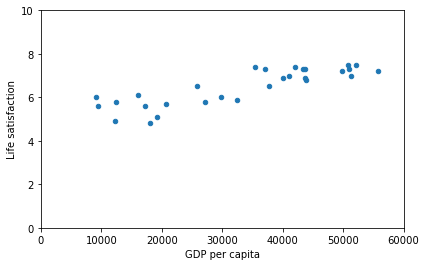

In [11]:
# Load the data
oecd_bli = pd.read_csv("oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")


# Prepare the data
country_stats, full_country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(6.5,4))
plt.axis([0, 60000, 0, 10])
plt.show()

Here, we are chaning the x-axis up to 110,000 to present more data. We have outliers that show somewhat different trend from the previous. 

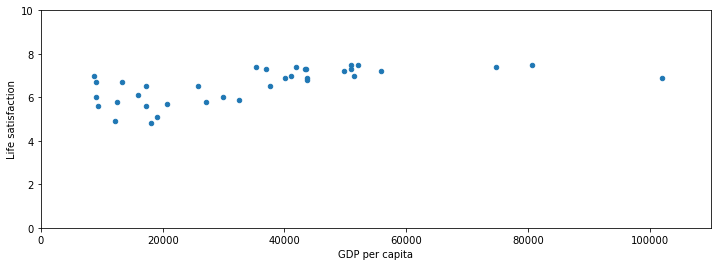

In [12]:
# Visualize the full data
# Visualize the data
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(12,4))
plt.axis([0, 110000, 0, 10])
plt.show()

In [13]:
# Data for training
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]

print(Xfull.shape, yfull.shape)

(36, 1) (36, 1)


In the following cell, you will train different polynomial regressions models with varying degrees from 1 (linear), 2, 5, 10, and 30. As you catch already, higher dgree makes the model more complex. In a loop, the codes below trains the model, fit on the data, and plot the red regression curve over the data samples in blue dots. 

When you observe the following plots, you should remember the main purpose of training ML models is making a good prediction on future data, which is not seen before during training. We call this **generalization**. Looking the results, pick one that you think best.  

<Figure size 432x288 with 0 Axes>

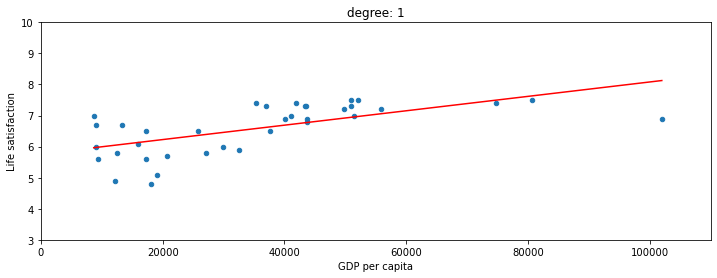

<Figure size 432x288 with 0 Axes>

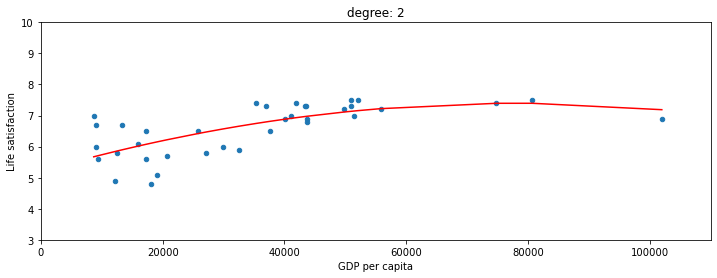

<Figure size 432x288 with 0 Axes>

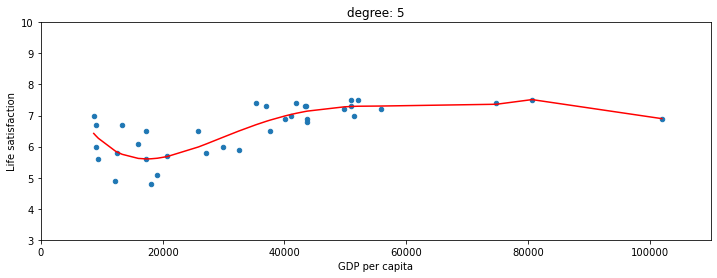

<Figure size 432x288 with 0 Axes>

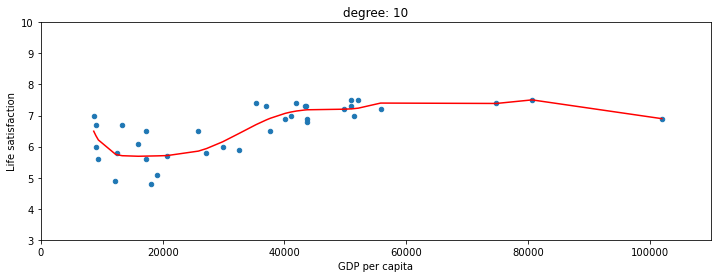

<Figure size 432x288 with 0 Axes>

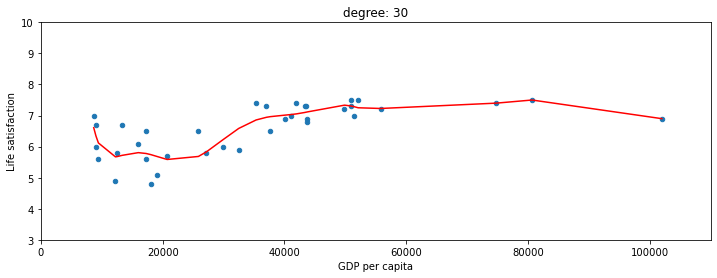

In [14]:
# polynomial model to this data

for deg in [1, 2, 5, 10, 30]:
    plt.figure();
    full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                            figsize=(12,4));
    plt.axis([0, 110000, 3, 10]);
    
    # training a polynomial regression model
    Xp, mu, sd, wp = poly_regress(Xfull.flatten(), deg, yfull.flatten(), normalize=True)
    
    # making a prediction (fit) using the learned weight wp
    yp1 = Xp @ wp

    # plot curve 
    plt.plot(Xfull, yp1, 'r-', label=deg);
    plt.title("degree: {}".format(deg));



As the complexity of model grows, you may have small training errors. However, there is no guarantee that you have a good generalization (you may have very bad generalization error!). 
This is called **Overfitting** problem in machine learning. From training data, once you learned the hypothesis *h* (or machine learning model), you can have training error $E_{train}(h)$ and testing error $E_{test}(h)$. Let us say that there is another model $h^\prime$ for which

$$ E_{train}(h) < E_{train}(h^\prime) \wedge E_{test}(h) > E_{test}(h^\prime).$$

Then, we say the hypothesis $h$ is "overfitted." 

## Bias-Variance Tradeoff

Here the bias refers an error from erroneous assumptions and the variance means an error from sensitivity to small variation in the data. Thus, high bias can cause an underfitted model and high variance can cause an overfitted model. Finding the sweet spot that have good generalization is on our hand. 

In the same track of discussion, Scott summarizes the errors that we need to consider as follows: 

- high bias error: under-performing model that misses the important trends
- high variance error: excessively sensitive to small variations in the training data
- Irreducible error: genuine to the noise in the data. Need to clean up the data

![](http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/bias-and-variance.jpg)
<center>From Understanding the Bias-Variance Tradeoff, by Scott Fortmann-Roe</center>

## Regularization

We reduce overfitting by addding a complexity penalty to the loss function. The error function below now has additional penalty term (you can notice the error function is exactly same but the second term). With the addition, the error grows when nonzero weights are included. That is, to lower the error, your ML model favors to lower the weight values to make the model simple along with finding the best fit. Here follows the loss function for the linear regression with $L2$-norm:   
$$
E(\wv) = \sum_i^N ( y_i - t_i)^2 + \lambda \lVert \wv \rVert_2^2. 
$$

The error function can be expanded as follows for easier derivation next.
$$
\begin{align*}
E(\wv) &= \sum_i^N ( y_i - t_i)^2 + \lambda \lVert \wv \rVert_2^2  \\
  \\
  &= \sum_i^N ( y_i - t_i)^2 + \lambda \sum_k^D w_k^2 \\
  \\
  &= (\Xm \wv - T)^\top (\Xm \wv - T)  + \lambda \wv^\top \wv \\
  \\
  &= \wv^\top \Xm^\top \Xm \wv - 2 \Tm^\top \Xm \wv + \Tm^\top \Tm  + \lambda \wv^\top \wv 
\end{align*}
$$

Repeating the derivation as in linear regression, we can get the gradient

$$
\begin{align*}
\frac{\partial E(\wv)}{\partial \wv} &= \frac{\partial (\Xm \wv - \Tm)^\top (\Xm \wv - \Tm)}{\partial \wv} + \frac{\partial \lambda \wv^\top \wv}{\partial \wv} \\
        \\
        &= 2 \Xm^\top \Xm \wv - 2 \Xm^\top \Tm + 2 \lambda \wv
\end{align*}
$$

Setting the last term zero, we reach the solution of *ridge regression*: 

$$
\begin{align*}
 2 \Xm^\top \Xm \wv - 2 \Xm^\top \Tm  + 2 \lambda \wv &= 0\\
\\
\big(\Xm^\top \Xm + \lambda \Im \big) \wv &= \Xm^\top \Tm\\
\\
\wv &= \big(\Xm^\top \Xm + \lambda \Im \big)^{-1} \Xm^\top \Tm.
\end{align*}
$$

The ridge regression has the ridge parameter $\lambda$, which is only difference from the previous least square solution. This simple addition relieves overfitting by producing a simpler solution, possibly more generalizable one.
Now, let us think about the ridge parameter and how to choose one for the model together.

In the next practice, implement ridge regression algorithm by modifying the poly_regress function and fit it to the sample data above. 

In [15]:
def poly_regress(x, d=3, t=None, lamb=1, **params):
    """  ridge regression function
    
         x         input data
         t         training target
         d         the degress of polynomial transform
         lamb      ridge parameter lambda. default 1
         normalize boolean option for normalization
         @X_poly   transformed input 
         @w        the trained weight w
    """
    
    bnorm = params.pop('normalize', False)
    
    X_poly = []
    # Transformation: append polynomial terms
    for i in range(d+1):
        X_poly.append(x**i)
    
    X_poly = np.vstack(X_poly).T
    
    # normalize 
    if bnorm:
        mu, sd = np.mean(X_poly[:, 1:, None], axis=0), np.std(X_poly[:, 1:, None], axis=0)
        X_poly[:, 1:] = (X_poly[:, 1:] - mu.flat) / sd.flat
        
    # least sqaures
    if t is not None:
        # TODO: implement ridge regression.  
        #.      Hint: numpy has eye function for identity matrix
        w = np.linalg.lstsq(X_poly.T @ X_poly + lamb*np.eye(X_poly.shape[1]), X_poly.T @ t, rcond=1)[0]

        if bnorm:
            return X_poly, mu, sd, w
        return X_poly, w
    
    if bnorm:
        return X_poly, mu, sd
    return X_poly

You just modify the polynomial regression with regularization. Let us apply this to the GDP data above. For this, we borrow the previous codes to make the test function.

In [16]:
# copy of previous polynomial regression test function
def test(lamb=0):
    plt.figure();
    full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',
                            figsize=(12,4));
    plt.axis([0, 110000, 3, 10]);

    # training a polynomial regression model
    Xp, mu, sd, wp = poly_regress(Xfull.flatten(), deg, yfull.flatten(), lamb, normalize=True)

    # making a prediction (fit) using the learned weight wp
    yp1 = Xp @ wp

    # plot curve 
    plt.plot(Xfull, yp1, 'r-', label=deg);
    plt.title("degree: {} $\lambda$: {}".format(deg, lamb));


<Figure size 432x288 with 0 Axes>

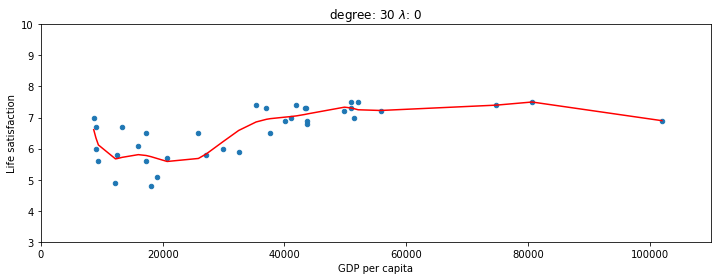

In [17]:
test()

Now, make a for-loop that creates multiple figures with varying lambda of [0, 0.01, 0.1, 1, 10]. 
What do you observe? How does the $\lambda$ affect on the fit? 

<Figure size 432x288 with 0 Axes>

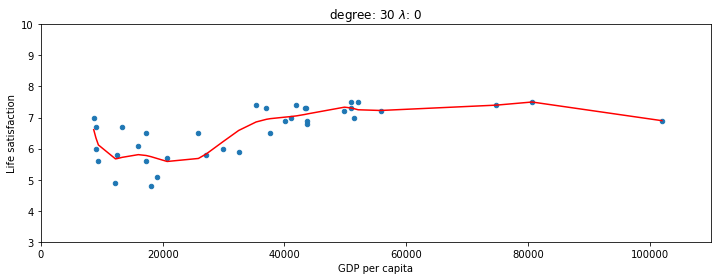

<Figure size 432x288 with 0 Axes>

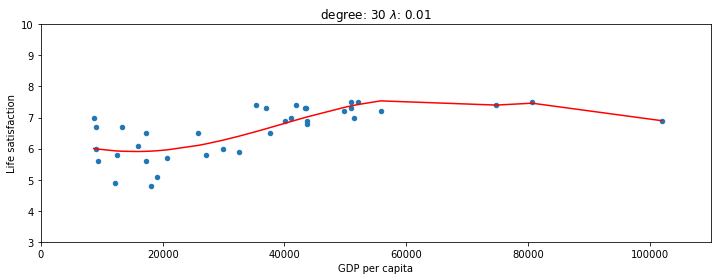

<Figure size 432x288 with 0 Axes>

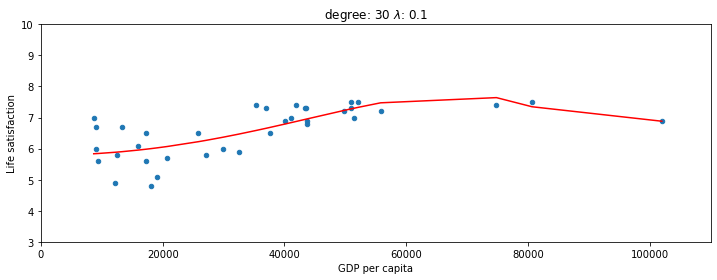

<Figure size 432x288 with 0 Axes>

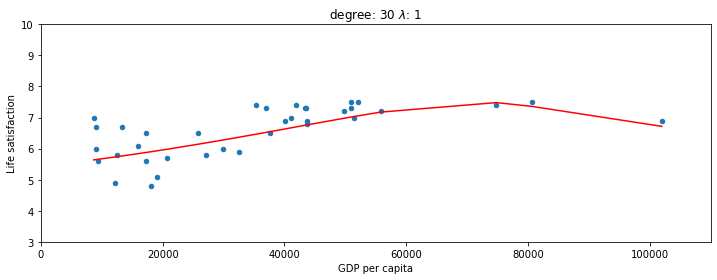

<Figure size 432x288 with 0 Axes>

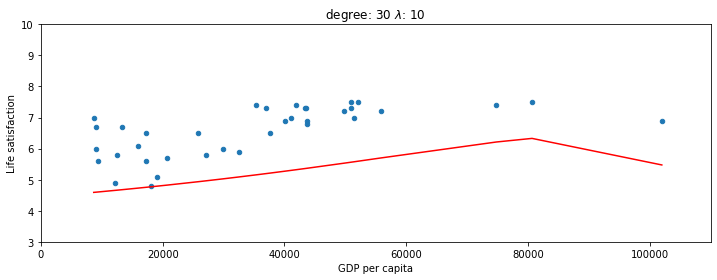

In [18]:
#plt.figure(figsize=(12,8))
for lamb in [0, 0.01, 0.1, 1, 10]:
    test(lamb)